<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-61/blob/main/Semana_3_Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 3 - Actividad 1

**Nombre 1:** Daniela Estevez Rodriguez

**Matricula 1:** A01793723
<br>
<br>

**Nombre 2:** Ernesto Nicanor Santillán Guerrero 

**Matricula 2:** A01793675
<br>
<br>

**Materia:** Ciencia y analítica de datos

**Profesor:** Jobish Vallikavungal Devassia

**Fecha:** 4 de Octubre de 2022

# Limpieza de datos

La limpieza de datos implica observar más de cerca los problemas en los datos que ha seleccionado incluir en el análisis.

### Problema de datos 

In [ ]:
import pandas as pd
import numpy as np

Podemos crear un base de datos (DataFrame):

In [ ]:
x = {'Company': ['Ford', 'Ford', 'VW', 'BMW', 'Cooper', 'Cooper'], 
     'Stars' : [1, 2, np.nan, 2, 1, 1], 
     'Weight' : [2, 4, 2, 2, 3, None], 
     'Origin' : ['China', 'Mexico', 'Mexico', None, 'China', np.nan], 
     'Length': [40, 50, 30, np.nan, 45, pd.NaT]
}

In [ ]:
df  = pd.DataFrame(data = x)
df

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40
1,Ford,2.0,4.0,Mexico,50
2,VW,NaN,2.0,Mexico,30
3,BMW,2.0,2.0,None,NaN
4,Cooper,1.0,3.0,China,45
5,Cooper,1.0,NaN,NaN,NaT


Guardamos en un archivo CSV (coma separated value)

In [ ]:
df.to_csv('data.csv')

Alternativamente, podemos leer un conjunto de datos ya disponible:

In [ ]:
df = pd.read_csv('/content/data.csv', index_col=0)
df

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Para verificar, ¿falta algún dato?: **No**

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().any()

Company    False
Stars       True
Weight      True
Origin      True
Length      True
dtype: bool

alternativamente:

In [ ]:
df.isna().values.any()

True

In [ ]:
df.isna().any()

Company    False
Stars       True
Weight      True
Origin      True
Length      True
dtype: bool

In [ ]:
df

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


### Solucion 1: 

Descartar las observaciones con valores faltantes

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().values.any()

False

In [ ]:
df

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
4,Cooper,1.0,3.0,China,45.0


El problema con esta estrategia es que, 
>> si falta algún dato en todo el conjunto de datos, la fila correspondiente se elimina.

In [ ]:
df = pd.read_csv('/content/data.csv', index_col=0)
df.isna().any()

Company    False
Stars       True
Weight      True
Origin      True
Length      True
dtype: bool

In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Suelte las columnas donde falta al menos un elemento.

In [ ]:
ndf.dropna(axis = 1, inplace = True) # axis 1 is columns / axis 0 is rows. 
ndf

,Company
0,Ford
1,Ford
2,VW
3,BMW
4,Cooper
5,Cooper


In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Drop the rows where all elements are missing.

In [ ]:
ndf.dropna(how='all', inplace = True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Alternativamente: usamos Threshold. 

Mantenga solo las filas con al menos 2 valores que  **NO SEAN** `nan`


In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


In [ ]:
ndf.dropna(thresh=4, inplace = True) # In a row, it needs at least 4 nan values is needed, to maintain in df
ndf # in case of column  add   axis=1 

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
4,Cooper,1.0,3.0,China,45.0


Defina en qué columnas buscar valores faltantes.

In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


In [ ]:
ndf.dropna(thresh = 5,  #if there is not 5 nan values, the column will be eliminated 
           axis = 1, 
           inplace = True
           ) 
ndf 

,Company,Stars,Weight
0,Ford,1.0,2.0
1,Ford,2.0,4.0
2,VW,NaN,2.0
3,BMW,2.0,2.0
4,Cooper,1.0,3.0
5,Cooper,1.0,NaN


Para saber mas: 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

### Solucion 2: 



In [ ]:
ndf = df.copy()

In [ ]:
wm = ndf.Weight.mean()
wm

2.6

In [ ]:
ndf['Weight'].fillna(value = wm, 
                    inplace = True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,2.6,NaN,NaN


[Datos faltantes: dos grandes problemas con la imputación media](https://www.theanalysisfactor.com/mean-imputation/)

In [ ]:
ndf['Length'].fillna(value = ndf.Length.median(), 
                    inplace = True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,42.5
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,2.6,NaN,42.5


In [ ]:
mm  = ndf.Origin.mode()
mm

0     China
1    Mexico
dtype: object

In [ ]:
mm[1]

'Mexico'

In [ ]:
ndf['Origin'].fillna(value = mm[1], #'NoPais', 
                    inplace = True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,Mexico,42.5
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,2.6,Mexico,42.5


In [ ]:
ndf.isnull().values.any()

True

In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Impute particular columns - 

In [ ]:
ndf.dropna(subset=['Origin', 'Length'], inplace = True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
4,Cooper,1.0,3.0,China,45.0


In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Fill values in each column with favorite strategy: 

In [ ]:
ndf.Origin.mode()[0]

'China'

In [ ]:
favs = {'Origin': ndf.Origin.mode()[0], 'Length': ndf['Length'].mean()}

In [ ]:
ndf.Origin.fillna(ndf.Origin.mode()[0], inplace=True)
ndf.Length.fillna(ndf.Length.mean(), inplace=True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.00
1,Ford,2.0,4.0,Mexico,50.00
2,VW,NaN,2.0,Mexico,30.00
3,BMW,2.0,2.0,China,41.25
4,Cooper,1.0,3.0,China,45.00
5,Cooper,1.0,NaN,China,41.25


more on `fillna` method : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

More on Imputing strategies: https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/

## ¿Cuándo es una mediana mejor en comparación con la media?

In [ ]:
data = {'Salary':  [28, 30, 30, 35, 37, 40, 400]
}
adf = pd.DataFrame(data)
adf

,Salary
0,28
1,30
2,30
3,35
4,37
5,40
6,400


In [ ]:
adf.describe()

,Salary
count,7.000000
mean,85.714286
std,138.653903
min,28.000000
25%,30.000000
50%,35.000000
75%,38.500000
max,400.000000


### Para seleccionar las columnas de la base de datos, puede usar la siguiente codigos: 



In [ ]:
df = pd.read_csv('/content/data.csv', index_col=0)
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


** Syntaxis ** de loc & iloc

* loc : If you use, `loc`, use the `names`

> df.`loc` [ row-start:row-end,  column-start:column_end]  



* iloc : If you use, `loc`, use the `indices`

> df.`iloc` [row-start:row-end, column-start:columnEnd]  

In [ ]:
ndf.columns

Index(['Company', 'Stars', 'Weight', 'Origin', 'Length'], dtype='object')

In [ ]:
ndf.columns.sort_values()

Index(['Company', 'Length', 'Origin', 'Stars', 'Weight'], dtype='object')

In [ ]:
ndf.loc[2:5 , 'Company':'Origin']  # rows 2 to 5, columns  'Company' to 'Origin'

,Company,Stars,Weight,Origin
2,VW,NaN,2.0,Mexico
3,BMW,2.0,2.0,NaN
4,Cooper,1.0,3.0,China
5,Cooper,1.0,NaN,NaN


In [ ]:
favs = ['Stars', 'Weight', 'Origin']

In [ ]:
ndf.loc[2:5 , favs]

,Stars,Weight,Origin
2,NaN,2.0,Mexico
3,2.0,2.0,NaN
4,1.0,3.0,China
5,1.0,NaN,NaN


In [ ]:
ndf.iloc[2:5, [1,2, 3]] # iloc  - so, indices

,Stars,Weight,Origin
2,NaN,2.0,Mexico
3,2.0,2.0,NaN
4,1.0,3.0,China


In [ ]:
ndf.columns

Index(['Company', 'Stars', 'Weight', 'Origin', 'Length'], dtype='object')

In [ ]:
for i in ndf.columns:
  print(i)

Company
Stars
Weight
Origin
Length


In [ ]:
ndf.head(4)

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN


In [ ]:
ndf.Company.unique()

array(['Ford', 'VW', 'BMW', 'Cooper'], dtype=object)

In [ ]:
df.groupby(['Company', 'Origin']).size()

Company  Origin
Cooper   China     1
Ford     China     1
         Mexico    1
VW       Mexico    1
dtype: int64

In [ ]:
df[['Company', 'Origin']].value_counts()

Company  Origin
Cooper   China     1
Ford     China     1
         Mexico    1
VW       Mexico    1
dtype: int64

### Eliminar columns / Cambiar nombre de las columns

In [ ]:
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


In [ ]:
ndf2 = ndf.drop(['Stars', 'Origin',], axis = 1)
ndf2

,Company,Weight,Length
0,Ford,2.0,40.0
1,Ford,4.0,50.0
2,VW,2.0,30.0
3,BMW,2.0,NaN
4,Cooper,3.0,45.0
5,Cooper,NaN,NaN


In [ ]:
ndf2.rename(columns = {'Company' : 'Empresa', 'Weight': 'Peso'}, inplace = True)
ndf2

,Empresa,Peso,Length
0,Ford,2.0,40.0
1,Ford,4.0,50.0
2,VW,2.0,30.0
3,BMW,2.0,NaN
4,Cooper,3.0,45.0
5,Cooper,NaN,NaN


## Datos perdidos - Tener en cuenta

* Excluya las filas o características. 
* Cumpliméntelas con un valor estimado.

Errores de datos	Utilice recursos lógicos para descubrir errores manuales y corríjalos. O, excluya las características.


Incoherencias de codificación	Decida un esquema de codificación simple y convierta y sustituya los valores.


Metadatos perdidos o erróneos	Examine manualmente los campos sospechosos y compruebe el significado correcto.

## Actividad 1 - Parte 1

**Fundamentos de bases de datos y para ciencia de datos**

Primero que nada, hay que comenzar definiendo que es una base de datos. Se entiende por base de datos a un conjunto de listas que están organizados formando columnas (también conocidas “features”, características en español o campos), filas (también llamadas registros o instancias). Adicionalmente, de acuerdo con otras definiciones, una base de datos modela al mundo real en forma de datos ya que es un conjunto de datos relacionados que se almacenan.

os conceptos principales derivados de base de datos son:
1.    Tablas: una forma de observar la información contenida en una base de datos en forma de filas y columnas.
2.    Nombre de campo: identificador de una columna, normalmente hace referencia a la información contenida en ella.
3.    Campo: categoría de una base de datos, se trata de uno de los datos recopilados para cada registro o instancia de la base.
4.    Registro: información registrada de un sujeto o situación particular (Se recaba información para completar cada campo).
5.    Celda: intersección de una fila y columna en una tabla.
6.    Datos: conjunto de registros de una base de datos
7.    Objetos: formas diferentes de ver la información de una base de datos. Por ejemplo: tablas, consultas, formularios, etc.

Ahora, la ciencia de datos es una ciencia que combina las matemáticas, estadística, programación, análisis, inteligencia artificial y aprendizaje automático con conocimiento del dominio (experiencia en un tema específico que apoya en la toma de decisiones de un proyecto de ciencia de datos).
La ciencia de datos involucra varias etapas y variable herramientas y procesos. Los pasos que normalmente se siguen son:

1.    Recolección de datos desde varias fuentes.
2.    Almacenamiento y preprocesamientos de datos.
3.    Análisis de datos: en esta etapa entra el análisis exploratorio de datos para examinar sesgos, patrones, etc.
4.    Comunicación: los “insights” (revelaciones en español) descubiertos solo son útiles si le llevan a las personas correctas por lo que una parte importante del proceso es cómo comunicar los conocimientos encontrados.
 


**Fundamentos de almacenes de datos (Data Warehouse) para ciencia de datos**

Los almacenes de datos son donde se guarda y mantiene la información que usan como materia prima los científicos de datos. Normalmente los almacenes de datos captan su información de distintas fuentes como bases de datos relacionales y sistemas transaccionales. Los almacenes de datos juntan toda esta información y lo presentan de una manera digerible al usuario final. Los almacenes de datos obtienen su información de diversas fuentes, los procesan y los transforman a un formato estándar. 

Los datos generalmente son almacenados de una manera eficiente de tal manera que se evita redundancia en la información. Una de estas técnicas es la de la normalización de los datos, esto asegura que se guarda solo la información necesaria. En este sentido normalización se refiere a tratar de guardar cada dato solo una vez y a su vez entendiendo como se relaciona estos datos con la demás información. Por ejemplo, cuando en un almacén de datos que guarda la información de los estudiantes que están cursando una carrera, solo se guarda el nombre del estudiante y/o su identificador dentro de la base de datos una vez. La demás información de este estudiante (como sus calificaciones) se obtienen usando los directorios de interconexión definidos en ese almacén. Otro de los retos de los almacenes de datos es como deben manejar datos faltantes, datos corruptos y un sinnúmero de situaciones que surgen en el proceso de captura y transformación de los datos.

Existen dos filosofías principales en la manera que se manipulan y transforman los datos en un almacén de datos.
La manera tradicional se conoce como ETL: Extraer, transformar y cargar (load). En esos sistemas normalmente se extrae la información de interés (por ejemplo, las ventas capturades en línea), posteriormente se transforma esa información a la forma estructurada deseada y se guardan los datos ya procesados. De esta manera con SQL o programas como Tableau se pueden correr consultas y generar gráficos de interés. Generalmente en esta metodología el proceso de transformación ocurre como un proceso independiente y fuera de línea.

La otra metodología comúnmente usada se conoce como ELT: Extraer, cargar y transformar.  Normalmente para esto se usan bases de datos distribuidas como Hadoop. El primer paso es similar se extrae la información, procedemos a cargarla al almacén y la transformación se hace directamente en línea tomando ventaja de las tecnologías de consultas distribuidas como Spark (Ryza 2017).  Spark te permite transformar y consultar clústeres de bases de datos de una manera eficiente y escalable.
Ambos métodos son ampliamente usados en la actualidad , pero ELT da mas flexibilidad durante el análisis, pero se necesita contar con la estructura de datos adecuada.

**Bibliografía:**

AWS Amazon. (s.f.). Amazon. Conceptos relacionados con el almacenamiento de datos. Recuperado en Octubre 4, 2022. Sitio Web: https://aws.amazon.com/data-warehouse/

IBM Cloud Education. (2022). IBM. Data Science. Recuperado en octubre 4, 2022. Sitio Web: https://www.ibm.com/cloud/learn/data-science-introduction
Kane, F. (2017). Hands-on data science and python machine learning. Packt Publishing Ltd.Enlaces a un sitio externo. Pp. 2061- 264

Metwalli, S. (2020). Introduction to Databases for Data Scientists. Recuperado en October 4, 2022. Sitio Web: https://towardsdatascience.com/databases-101-introduction-to-databases-for-data-scientists-ee18c9f0785d

Oracle. (s.f.). Oracle. What Is a Data Warehouse?. Recuperado en octubre 4, 2022. Sitio Web: https://www.oracle.com/database/what-is-a-data-warehouse/

Ryza, S. (2017). Advanced analytics with Spark : [patterns for learning from data at scale]. Beijing [U.A.] O’reilly.

SQL for Data Scientists  A Beginner's Guide for Building Datasets for Analysis, Renee M. P. Teate. Capítulo 1. 


## Actividad 1 - Parte 2

# Crear un informe de limpieza de datos


Registrar sus actividades de limpieza de datos es esencial para registrar las modificaciones de los datos. 

Los futuros proyectos de minería de datos se beneficiarán de los detalles del trabajo disponible.


Es una excelente idea considerar las siguientes cuestiones cuando genere el informe:


* ¿Qué tipos de ruido se han producido en los datos?
* ¿Qué métodos utiliza para eliminar el ruido? 
    
    > ¿Qué técnicas han demostrado ser eficaces?

* ¿Existen casos o atributos que no se pueden recuperar? 
> Asegúrese de registrar los datos que se han excluido por causas del ruido.

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [ ]:
# Librería de visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Datos desde github
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
data = pd.read_csv(url)

In [ ]:
# Creates a copy of the data
df=data.copy()

In [ ]:
# Muestra algunas filas en aleatorio del dataframe (df)
df.sample(n=5, random_state=1)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
10747,10748,310000,1.0,3.0,1.0,32.0,0.0,0.0,0.0,0.0,...,84373.0,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0.0
12573,12574,10000,2.0,3.0,1.0,49.0,-1.0,-1.0,-2.0,-1.0,...,1690.0,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,1.0
29676,29677,50000,1.0,2.0,1.0,28.0,-1.0,-1.0,-1.0,0.0,...,45975.0,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0.0
8856,8857,80000,2.0,3.0,1.0,52.0,2.0,2.0,3.0,3.0,...,40748.0,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,1.0
21098,21099,270000,1.0,1.0,2.0,34.0,1.0,2.0,0.0,0.0,...,22448.0,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0.0


In [ ]:
# Revisa el número de columnas y filas
print(f"Hay {df.shape[0]} filas y {df.shape[1]} columnas.")  # f-string

Hay 30000 filas y 25 columnas.


In [ ]:
# Muestra la info básica de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

**Comentarios:**

-> El dataframe consta de 25 variables de las cuales una es la variable de respuesta, 23 son variables explicativa y una es el ID de cada cliente.

-> La variable ID no nos da ninguna información.

-> Hay algunas columnas con datos faltantes.

-> Todas las variables son numéricas.

-> Las variables X2 a X4, X6 a X11, e Y deberían ser categóricas.


In [ ]:
# Cambia las variables X2 a X11 a categóricas
cat=['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']

for c in cat:
  df[c]=df[c].astype("category")

In [ ]:
# Revisa si hay duplicados
df.duplicated().sum()

0

**Comentarios:**

-> No hay duplicados. Podemos eliminar la variable ID

In [ ]:
# Elimina la variable ID
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
# Muestra la info básica de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      30000 non-null  int64   
 1   X2      29999 non-null  category
 2   X3      29998 non-null  category
 3   X4      29998 non-null  category
 4   X5      29995 non-null  float64 
 5   X6      29997 non-null  category
 6   X7      29995 non-null  category
 7   X8      29993 non-null  category
 8   X9      29991 non-null  category
 9   X10     29984 non-null  category
 10  X11     29986 non-null  category
 11  X12     29989 non-null  float64 
 12  X13     29989 non-null  float64 
 13  X14     29987 non-null  float64 
 14  X15     29985 non-null  float64 
 15  X16     29983 non-null  float64 
 16  X17     29990 non-null  float64 
 17  X18     29992 non-null  float64 
 18  X19     29991 non-null  float64 
 19  X20     29992 non-null  float64 
 20  X21     29989 non-null  float64 
 21  X22     2998

**Comentarios:**

-> Se elimino la columna ID.

-> Se convirtieron a categóricas las columnas X2 a X11, y la columna Y

In [ ]:
# Muestra un resumen estadístico de todas las variables
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X1,30000.0,NaN,NaN,NaN,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
X2,29999.0,2.0,2.0,18112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X3,29998.0,7.0,2.0,14030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4,29998.0,4.0,2.0,15964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,29995.0,NaN,NaN,NaN,35.484214,9.218024,21.0,28.00,34.0,41.00,79.0
X6,29997.0,11.0,0.0,14736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X7,29995.0,11.0,0.0,15728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X8,29993.0,11.0,0.0,15761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X9,29991.0,11.0,0.0,16450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X10,29984.0,10.0,0.0,16937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comentarios:**

-> Hay varias variables númericas con potenciales outliers ya que se observa una diferencia muy grande entre el min y el primer cuartil, y entre el máximo y el tercer cuartil.

-> El valor más comun para la variable de respuesta es 0, lo que significa que la mayoría de los clientes si pagan.

-> La mayoría de los clientes fueron a la universidad.

-> La mayoría de los clientes son solteros.

-> Sobre las variables X6 a X1, la mayoría de los clientes caen en la categoría 0. Hay que analisar más a fondo estas variables porque en la definición no vienen definidos el -2 ni el 0.

### Análisis Exploratorio de Datos

In [ ]:
# función para crear un boxplot y un histograma en la misma escala.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    # creating the 2 subplots

    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    # For histogram

    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    # Add mean to the histogram

    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")
    # Add median to the histogram

In [ ]:
# función para crear barplot con etiquetas


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Variables numéricas**

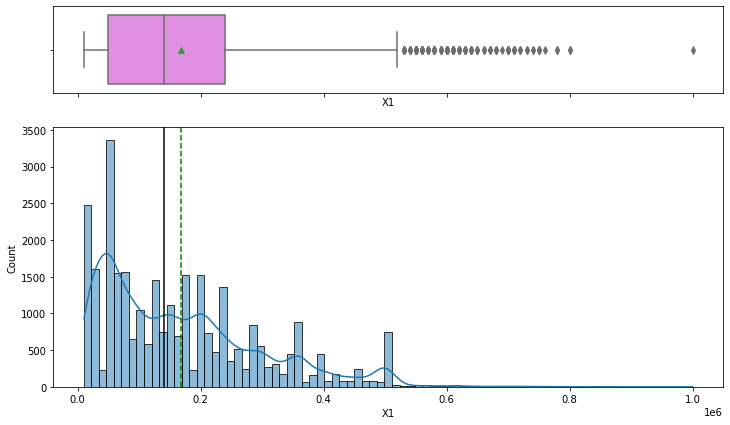

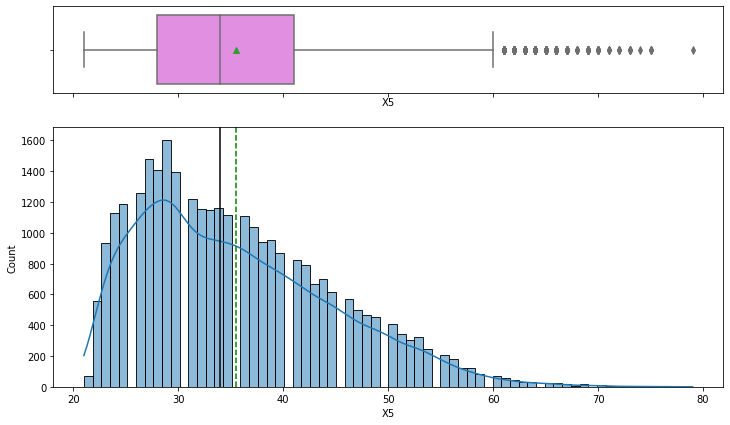

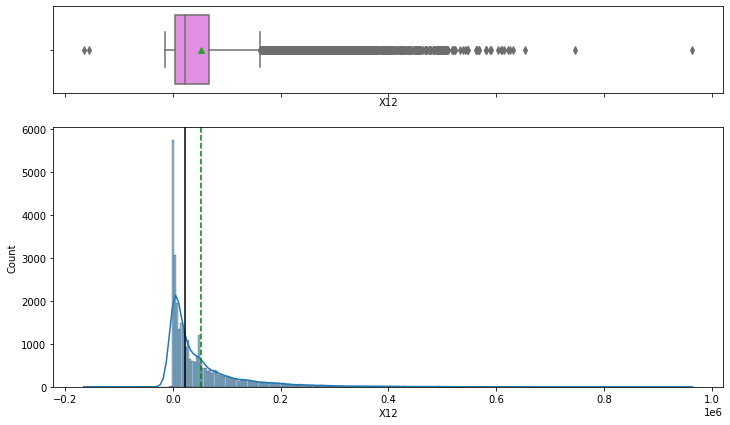

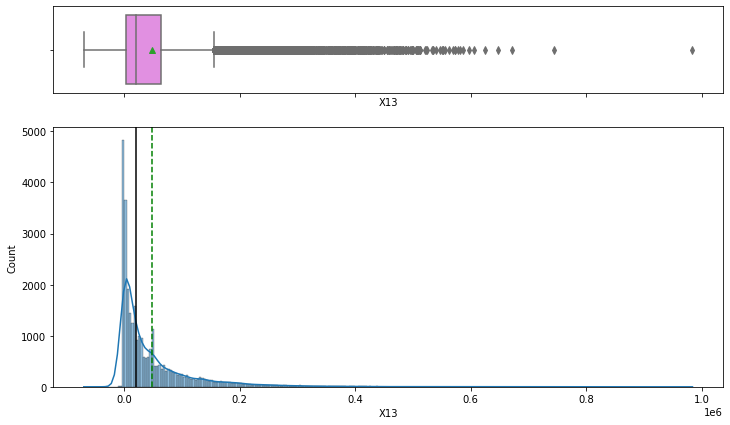

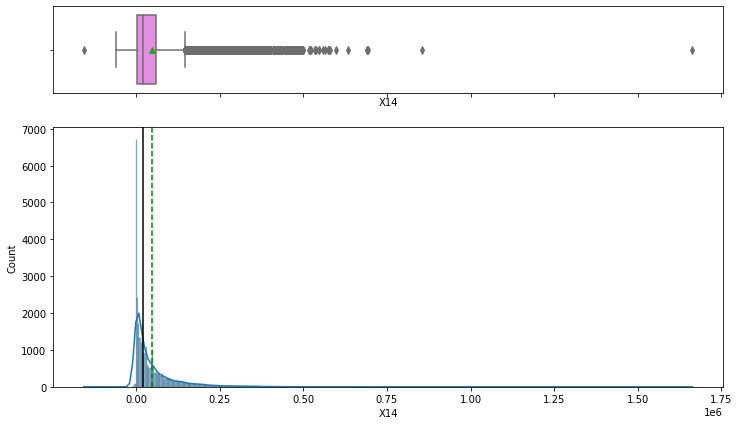

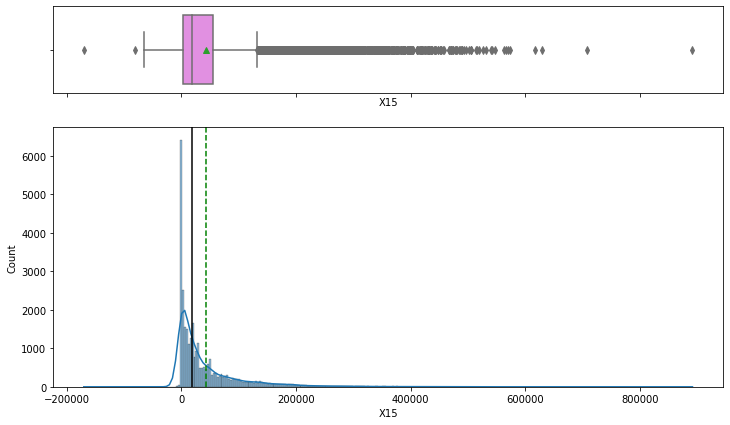

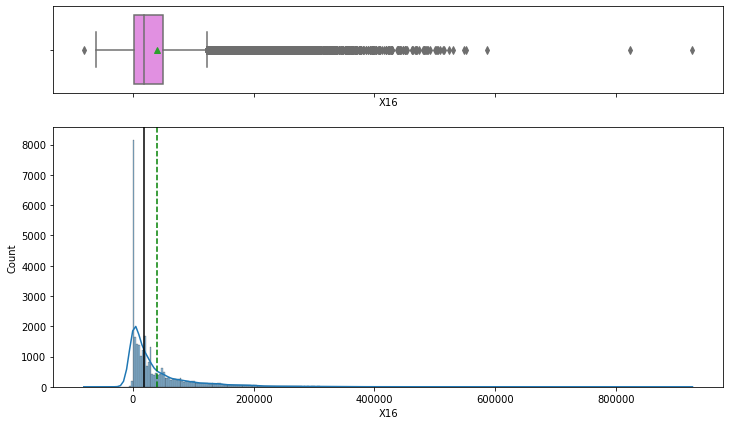

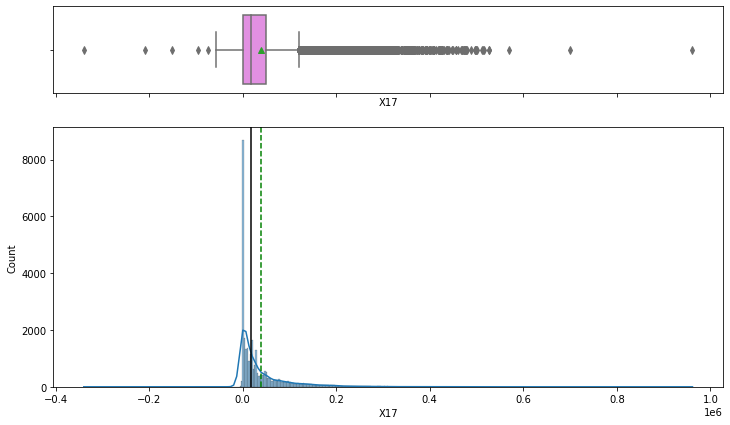

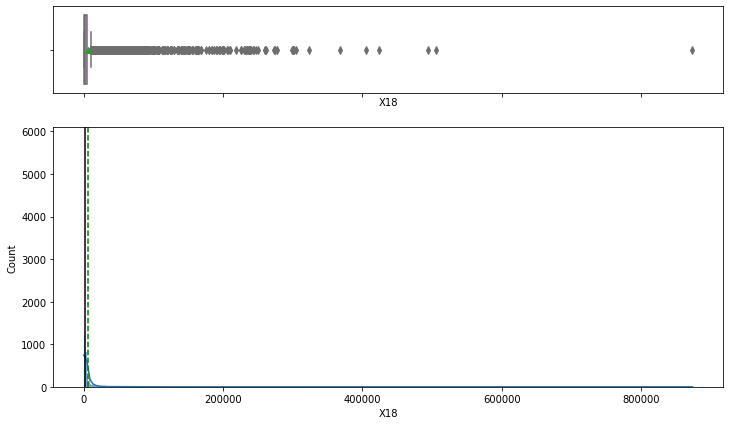

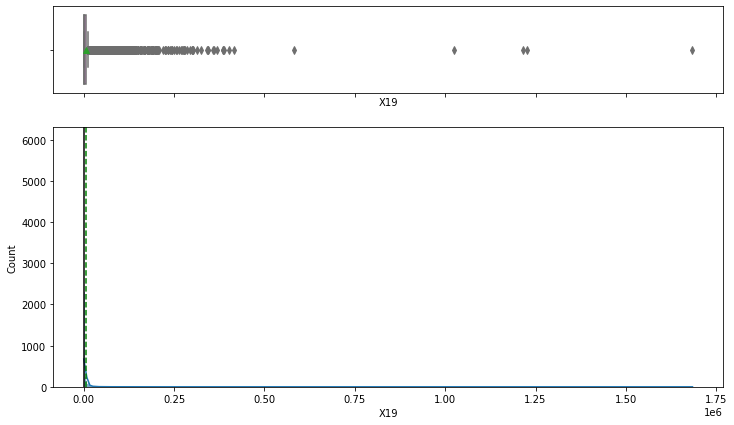

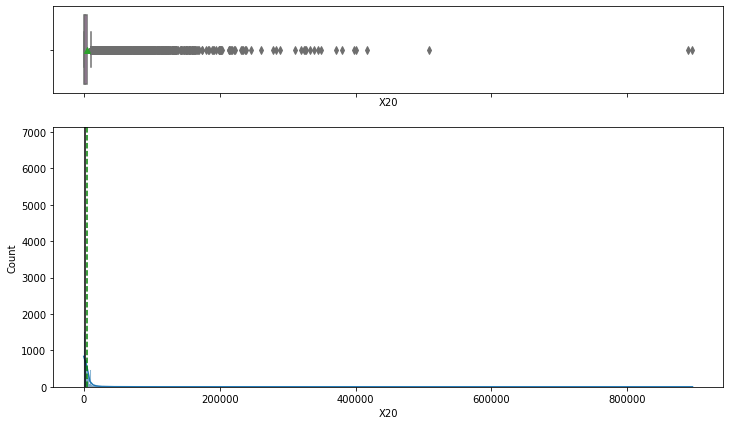

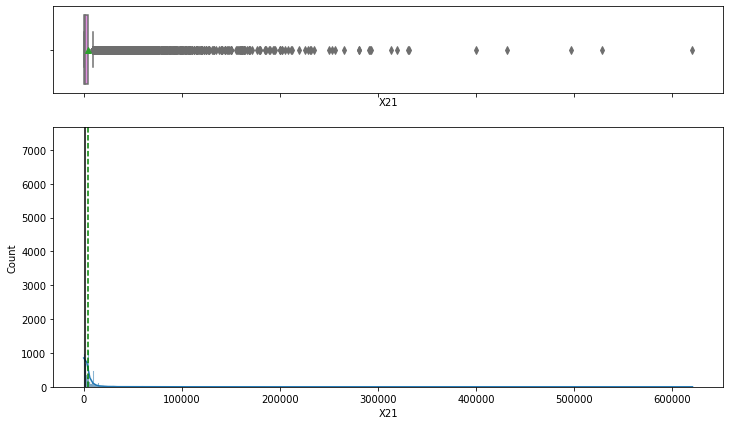

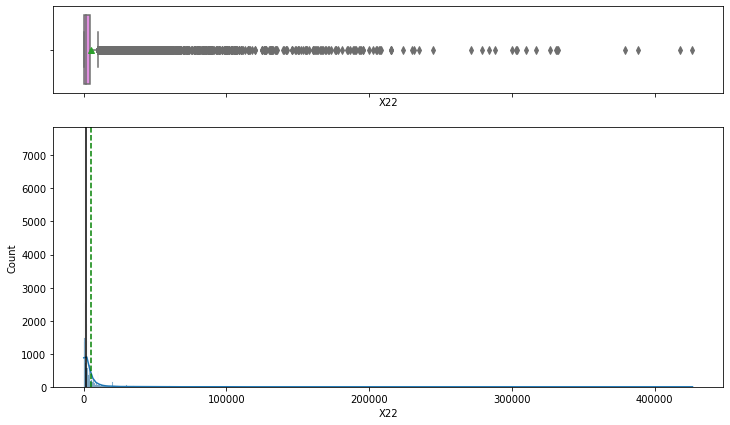

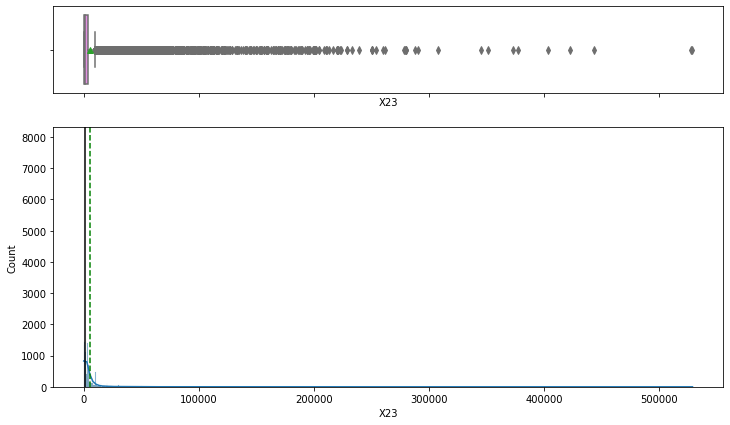

In [ ]:
# Crea lista de las variables numericas
num_col = df.columns[df.dtypes != "category"]

for n in num_col:
  histogram_boxplot(data=df, feature=n, kde=True)

**Comentarios:**

-> Se observa que todas las variables tienen sesgo a la izquierda y la mayoría tienen muchos valores que potencialmente podrían ser outliers.

**Variables categóricas**

Categoría X2


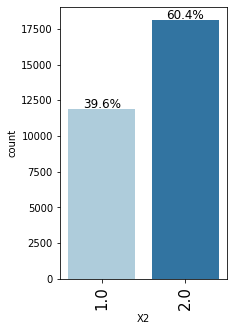

Categoría X3


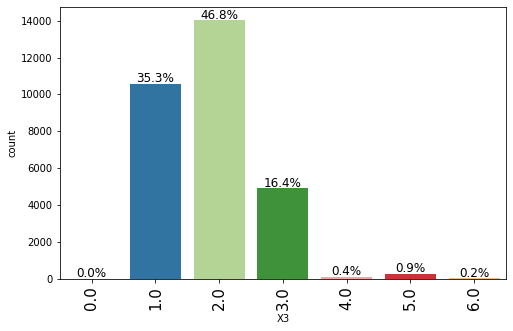

Categoría X4


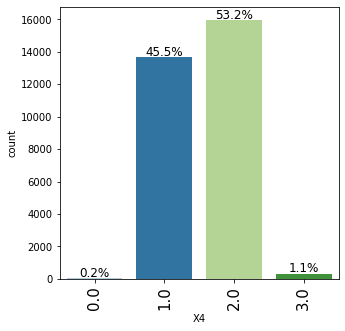

Categoría X6


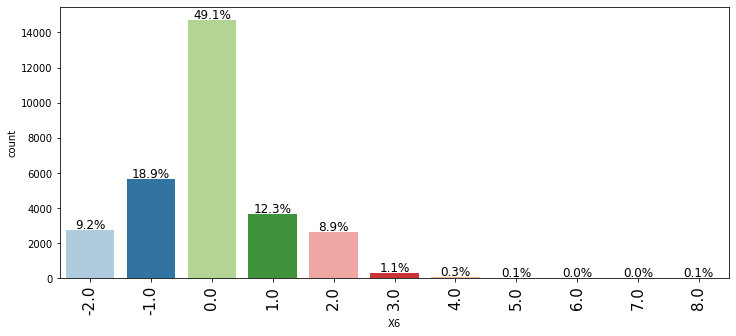

Categoría X7


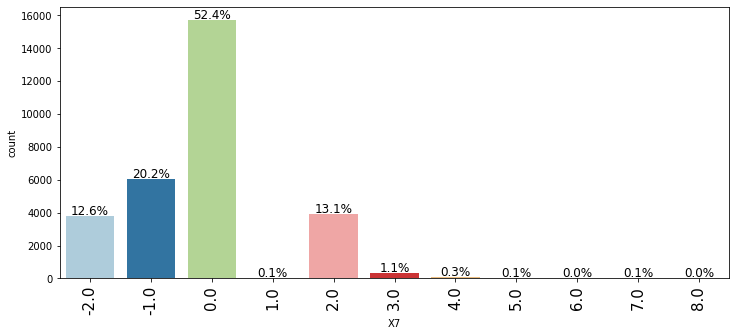

Categoría X8


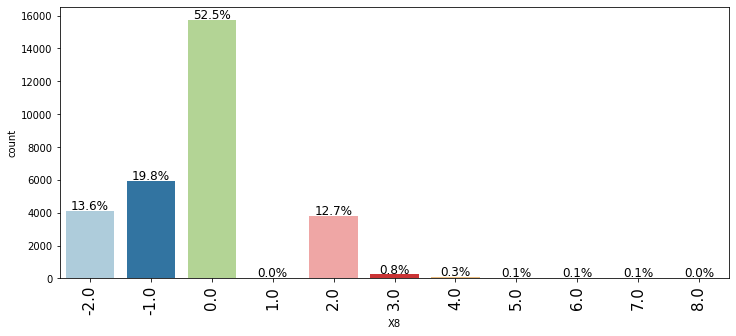

Categoría X9


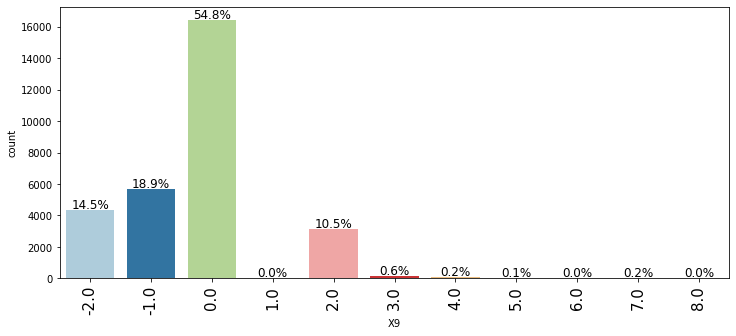

Categoría X10


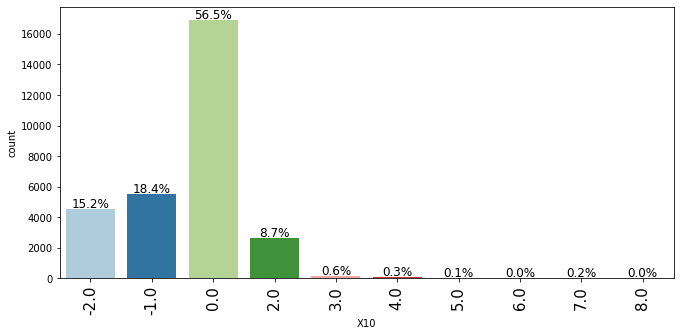

Categoría X11


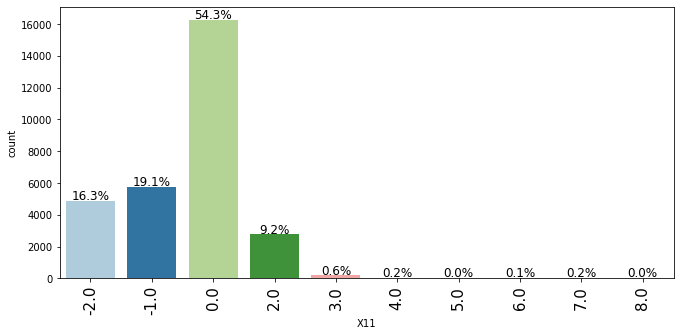

Categoría Y


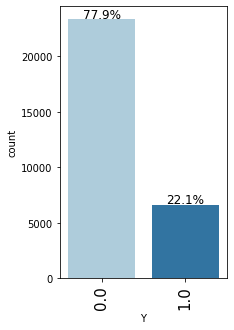

In [ ]:
# Crea lista de las variables categóricas

for c in cat:
  print("Categoría",c)
  labeled_barplot(data=df, feature=c, perc=True)

**Comentarios:**

-> En las gráficas anteriores observamos el porcentaje de clientes que hay en cada una de los valores que pueden tomar las variables categóricas.

### Análisis de variables X6 a X11

Pensamos en realizar un análisis de los pagos y los montos facturados para ver si es posible sustituir los 0 y -2 por -1.

In [ ]:
# Lista con variables X6 a X11
impago=list(df.columns[5:11])

# Saca porcentaje de cada valor para cada variable de X6 a X11
for i in impago:
  print("Columna", i)
  print(df[i].value_counts(normalize=True)*100)
  print("")

Columna X6
0.0     49.124912
-1.0    18.948562
1.0     12.294563
-2.0     9.197586
2.0      8.890889
3.0      1.073441
4.0      0.253359
5.0      0.086675
8.0      0.063340
6.0      0.036670
7.0      0.030003
Name: X6, dtype: float64

Columna X7
0.0     52.435406
-1.0    20.160027
2.0     13.092182
-2.0    12.608768
3.0      1.086848
4.0      0.330055
1.0      0.093349
5.0      0.083347
7.0      0.066678
6.0      0.040007
8.0      0.003334
Name: X7, dtype: float64

Columna X8
0.0     52.548928
-1.0    19.787951
-2.0    13.619845
2.0     12.732971
3.0      0.800187
4.0      0.253392
7.0      0.090021
6.0      0.076685
5.0      0.070016
1.0      0.013336
8.0      0.006668
Name: X8, dtype: float64

Columna X9
0.0     54.849788
-1.0    18.955687
-2.0    14.497683
2.0     10.526491
3.0      0.600180
4.0      0.230069
7.0      0.193391
5.0      0.116702
6.0      0.016672
1.0      0.006669
8.0      0.006669
Name: X9, dtype: float64

Columna X10
0.0     56.486793
-1.0    18.459845
-2.0    15.1

**Comentarios:**

-> Se observa que para todas las variables un gran porcentaje, alrededor del 50% de los clientes toman el valor de 0 y entre el 10% y 20% toman el valor de -2. Ni los valores 0 ni el -2, estan en la definición de los datos.

In [ ]:
# Creo subset de la df donde X6 toma valor de 0
df_1=df[df.X6==0]

In [ ]:
# Saca porcentaje de cada valor para cada variable de X6 a X11
for i in impago:
  print("Columna", i)
  print(df_1[i].value_counts(normalize=True)*100)
  print("")

Columna X6
0.0     100.0
-2.0      0.0
-1.0      0.0
1.0       0.0
2.0       0.0
3.0       0.0
4.0       0.0
5.0       0.0
6.0       0.0
7.0       0.0
8.0       0.0
Name: X6, dtype: float64

Columna X7
0.0     96.756023
-1.0     3.243977
-2.0     0.000000
1.0      0.000000
2.0      0.000000
3.0      0.000000
4.0      0.000000
5.0      0.000000
6.0      0.000000
7.0      0.000000
8.0      0.000000
Name: X7, dtype: float64

Columna X8
0.0     87.158952
2.0      5.823266
-1.0     5.178499
-2.0     1.622099
3.0      0.183250
4.0      0.027148
5.0      0.006787
1.0      0.000000
6.0      0.000000
7.0      0.000000
8.0      0.000000
Name: X8, dtype: float64

Columna X9
0.0     84.360576
-1.0     6.217757
2.0      6.088786
-2.0     3.054575
3.0      0.224002
4.0      0.040728
5.0      0.006788
6.0      0.006788
1.0      0.000000
7.0      0.000000
8.0      0.000000
Name: X9, dtype: float64

Columna X10
0.0     82.872853
-1.0     7.440092
2.0      5.152400
-2.0     4.269907
3.0      0.190075
4.

**Comentarios:**

-> Notamos que si hay cierta relación entre los clientes que tiene 0 en X6 y tienen 0 en X7 a X11.

In [ ]:
# Crea nueva columna que es la diferencia entre lo facturado y lo pagado
df_1["A1"]=(df_1["X12"]-df_1["X18"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Muestra todos los valores que toma la variable A1
df_1["A1"].value_counts().sort_values(ascending=False)

 51400.0     8
 0.0         5
 205150.0    4
 5865.0      4
 2524.0      4
            ..
 45163.0     1
-4211.0      1
 83164.0     1
 48937.0     1
 45851.0     1
Name: A1, Length: 13969, dtype: int64

**Comentario:**

-> Solo 5 clientes que pagaron el full de su factura correstpondiente a Sep 2005 tienen 0 en X6 (X6 corresponde a si pagaron o no Sep 2005)

-> NO se logro encontrar una relación entonces se procedera a convertir esos valores a NaN y luego sustituirlos por algún valor.

In [ ]:
# Cambio los 0 y -2 por NAN
for i in impago:
  df[df[i] == 0] = np.NAN
  df[df[i] == -2] = np.NAN

### Análisis de outliers

In [ ]:
# Crea lista de las variables numericas
num_col = df.columns[df.dtypes != "category"]

# Inicializa lista para columnas con posibles outliers
col_outliers = []

for colname in num_col:
    # Revisa si un valor es más de 4 veces el rango intercuartilico
    quartiles = np.quantile(df[colname], [0.25, 0.75])
    power_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(colname)
    print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
    outlier_screen_size = df.loc[
        np.abs(df[colname] - df[colname].median()) > power_4iqr, colname]
    print(outlier_screen_size)
    print(
        f"There were found {len(outlier_screen_size)} possible outlier out of {df.shape[0]}"
    )
    # Revisa si una columna tiene potenciales outliers
    if len(outlier_screen_size) > 0:
        col_outliers.append(colname)
    print("\n\n")

print(f"The columns with possible outliers are {col_outliers}")

X1
Q1 = nan, Q3 = nan, 4*IQR = nan
Series([], Name: X1, dtype: float64)
There were found 0 possible outlier out of 30000



X5
Q1 = nan, Q3 = nan, 4*IQR = nan
Series([], Name: X5, dtype: float64)
There were found 0 possible outlier out of 30000



X12
Q1 = nan, Q3 = nan, 4*IQR = nan
Series([], Name: X12, dtype: float64)
There were found 0 possible outlier out of 30000



X13
Q1 = nan, Q3 = nan, 4*IQR = nan
Series([], Name: X13, dtype: float64)
There were found 0 possible outlier out of 30000



X14
Q1 = nan, Q3 = nan, 4*IQR = nan
Series([], Name: X14, dtype: float64)
There were found 0 possible outlier out of 30000



X15
Q1 = nan, Q3 = nan, 4*IQR = nan
Series([], Name: X15, dtype: float64)
There were found 0 possible outlier out of 30000



X16
Q1 = nan, Q3 = nan, 4*IQR = nan
Series([], Name: X16, dtype: float64)
There were found 0 possible outlier out of 30000



X17
Q1 = nan, Q3 = nan, 4*IQR = nan
Series([], Name: X17, dtype: float64)
There were found 0 possible outlier out of 30000

**Comentarios:**

-> Ninguna columna resulto con un outlier según el creterior de superar 4 veces el rango intercuartílico. Esto es importarnte porque no se debe de rellenar vacios con la media cuando hay outliers puesto que es una metrica sensible a ellos. Para estos casos es mejor usar la mediana

### Relleno de datos faltantes

In [ ]:
df.shape

(30000, 24)

In [ ]:
# Checa que columnas tienen datos faltantes
df.isnull().sum().sort_values(ascending=False)

X16    25945
X13    25944
X15    25944
X14    25944
X12    25944
X8     25943
X10    25943
X11    25943
X9     25942
X7     25942
X22    25942
X17    25942
X18    25942
X19    25942
X20    25942
X21    25942
X6     25941
X5     25940
X4     25940
X3     25940
X23    25939
Y      25939
X2     25939
X1     25938
dtype: int64

**Comentarios:**

-> Hay 24 variables con datos faltantes, incluyendo a la variable de respuesta.

-> Debido a que lo que se quiere es predecir la variable de respuesta se procedera a eliminar los registros correspondientes a los valores faltantes para esa variable.

-> Para evitar bias en la media usaremos la mediana para rellenar los valores nulos de las variables numéricas.

-> Usaremos la moda para rellenar los valores nulos de las variables categóricas.

In [ ]:
# Eliminar registros nulos
df.dropna(subset=["Y"],axis=0,inplace=True)

In [ ]:
# Relleno de valores nulos en columnas númericas
for n in num_col:
  df[n].fillna(df[n].median(), inplace=True)  # imputación de mediana

# Crea lista de variables explicativas categóricas
cat_ex=['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

# Relleno de valores nulos en columnas categóricas
for c in cat_ex:
  df[c].fillna(df[c].mode()[0], inplace=True)  # imputación de mediana

In [ ]:
# Checa que columnas tienen datos faltantes
df.isnull().sum().sort_values(ascending=False)

X1     0
X2     0
X23    0
X22    0
X21    0
X20    0
X19    0
X18    0
X17    0
X16    0
X15    0
X14    0
X13    0
X12    0
X11    0
X10    0
X9     0
X8     0
X7     0
X6     0
X5     0
X4     0
X3     0
Y      0
dtype: int64

## Actividad 1 - Parte 3

Con base en los resultados de tu libreta de Google Colab de la Parte 2 responde detalladamente las siguientes preguntas: 

1. ¿Qué datos considero mas importantes? ¿Por qué?
2. ¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?
3. ¿Es necesario limpiar los datos para el análisis? Sí / No / ¿Por qué?
4. ¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.
5. ¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?

Extensión: 400 palabras o más entre todas las respuestas. 

1. ¿Qué datos considero mas importantes? ¿Por qué?

A este punto del análisis es complicado señalar algunas variables más importante puesto que sin intentar diseñar un modelo de predicción no podemos saber cuales variables nos van a dar más información.

Sin embargo, conciderando que el objetivo de los datos es predecir si un cliente va o no a pagar un crédito. Las variables que aparentan ser más importantes son las que tienen inforamción sobre los pagos (X6->X11).

2. ¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?

Se eliminaron 3 datos correspondientes a 3 registros que tenían la variable de respuesta Y faltante. Se eliminaron ya que lo que se quiere predecir es la variable Y y esos registros no iban a dar información sobre Y.

3. ¿Es necesario limpiar los datos para el análisis? Sí / No / ¿Por qué?

Siempre es necesario tener datos de buena calidad para realizar cualquier clase de análisis. Que significa limpiar varia de acuerdo a las necesidades de los datos y del análisis. Limpieza de datos puede significar cambiar el tipo de variable de alguna columna, resolver problemas de vacios, resolver porblemas de outliers, etc.

4. ¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.

Como mencionamos en la pregunta anterior en la pregunta anterior es de suma importancia para cualquier análisi tener datos de buena calidad. Sin embargo, cuando se quiere realizar un modelado sobre los datos, la calidad de la información toma un papel aun mayor.
 
Por ejemplo, para la mayoría de los modelos se requiere que los datos estén en un formato numérico. Por tanto, es importante trabajar los datos categóricos para convertirlos en su versión numérica. 
 
Dependiendo del tipo de modelo, y de la configuración, va a convenir simplemente cambiar las categorías por números o crear variables dummies para cada categoría de cada variable. 
 
En este caso por ejemplo, existe una cantidad importante de variables categóricas con un gran número de categoría. Las variables X6 a X11 pueden tomar los valores {-1,1,2,3,…,9}, lo que querría decir que por cada una de esas 6 variables si se crearan dummies se tendrían 9 variables nuevas, de esta manera, para este caso en particular podría decirse dejar las variables con los valores que tienen. 
 

5. ¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?
 
Primero que nada, se revisaron los tipos de variables. Se encontró que todas las variables estaban catalogadas como numéricas a pesar de que Y, X2, X3, X4, X6, X7,…, X11 son en realidad variables categóricas. Se realizó el cambio del tipo de variable a la adecuada. En seguida se reviso si existía duplicados; como no se encontró ninguno se procedió a eliminar la variable “ID” porque no aportaba información para el análisis.
 
De ahí, se procedió realizar varios análisis de las variables, entre los que se encuentran, gráficas, análisis de outliers, etc. En esos análisis se encontró que las variables X6, X7,…,X11 tomaban valores -2 y 0 que no estaban definidos en la explicación de los datos. Se intento revisar si eran igual a -1 revisando la relación entre el monto pagado y el monto facturado; sin embargo, no fue posible determinar si debía llevar -1. Se procedió a volver los valores -2 y 0 como NaN. 
 
El penúltimo paso fue eliminar los registros con valores vacíos en Y. Y, finalmente, se procedió a rellenar los valores NaN con la mediana (no se uso la media porque es más susceptible a valores muy grandes o pequeños) y la moda.
 
Es importante menciona que la única razón por la que se tomo la decisión de borrar los registros -2 y 0 es porque no tenemos la posibilidad de hablar con quien diseño el recopilado de los datos. En un caso real el primer paso sería revisar si fue un error o si se hizo un cambio a los valores que podía tomar la variable, etc.